In [2]:
from svird import *

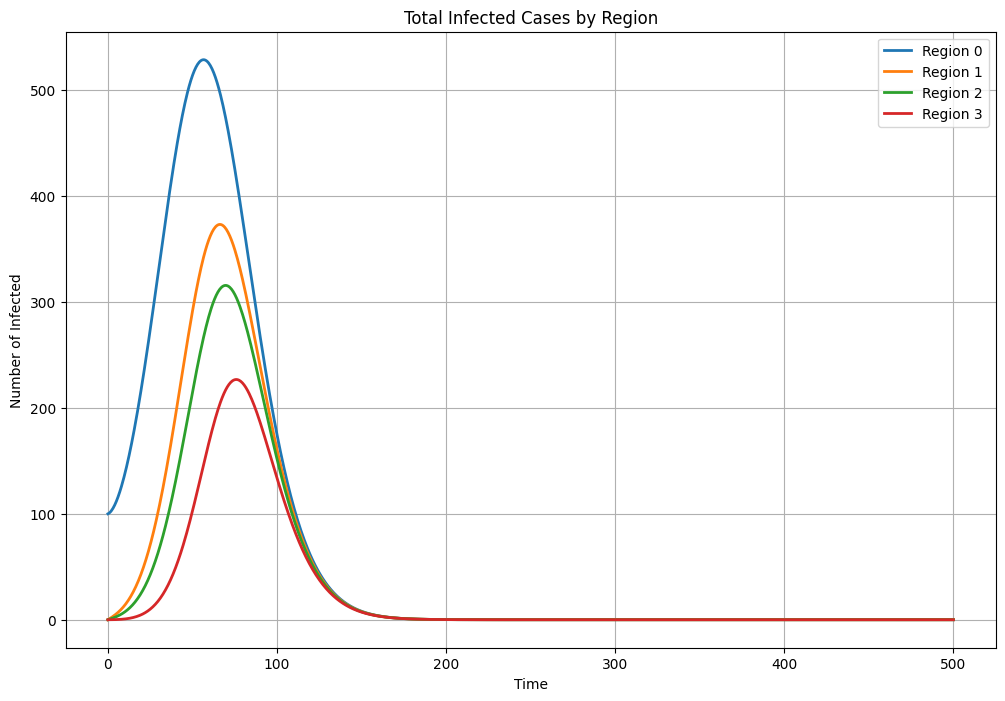

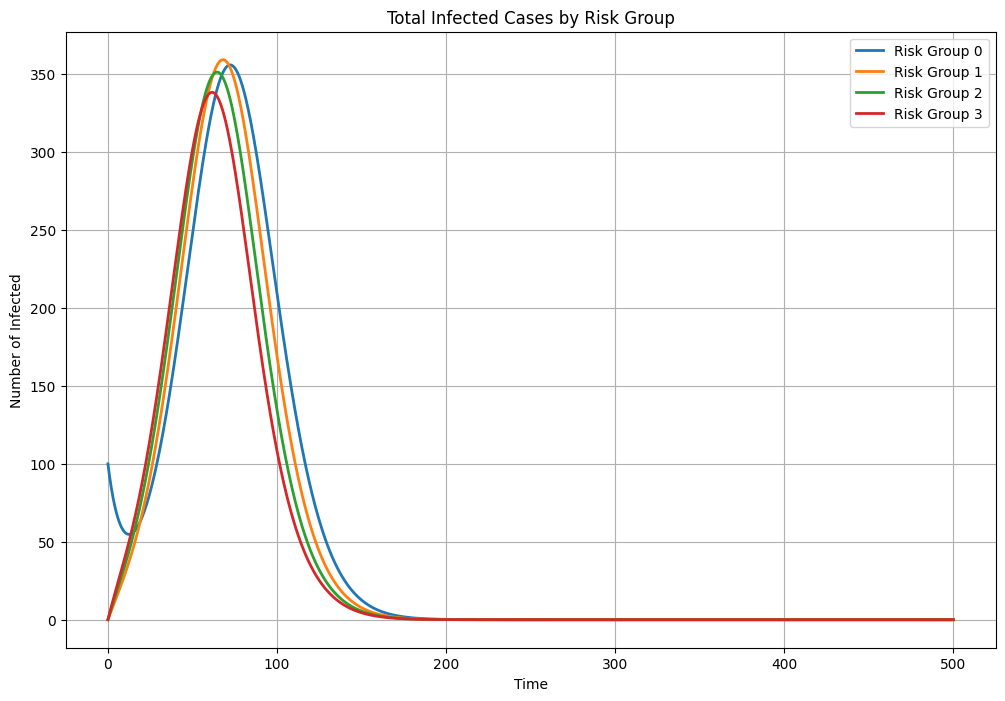

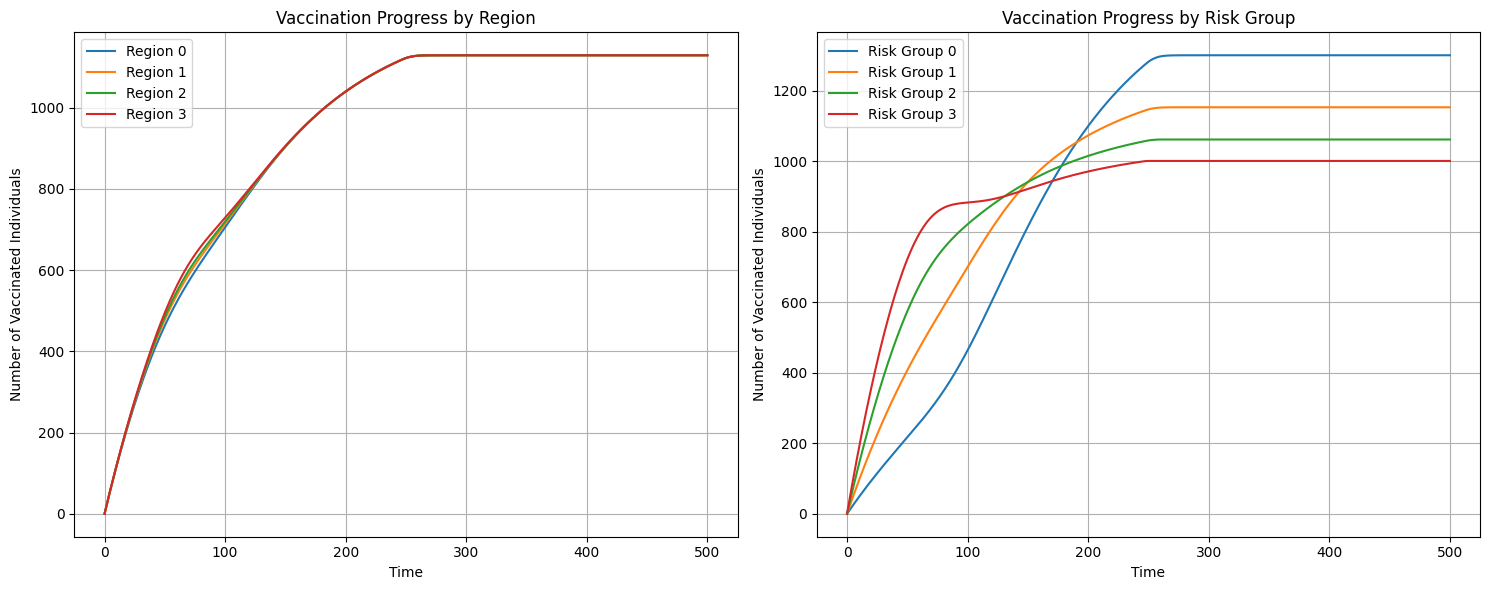

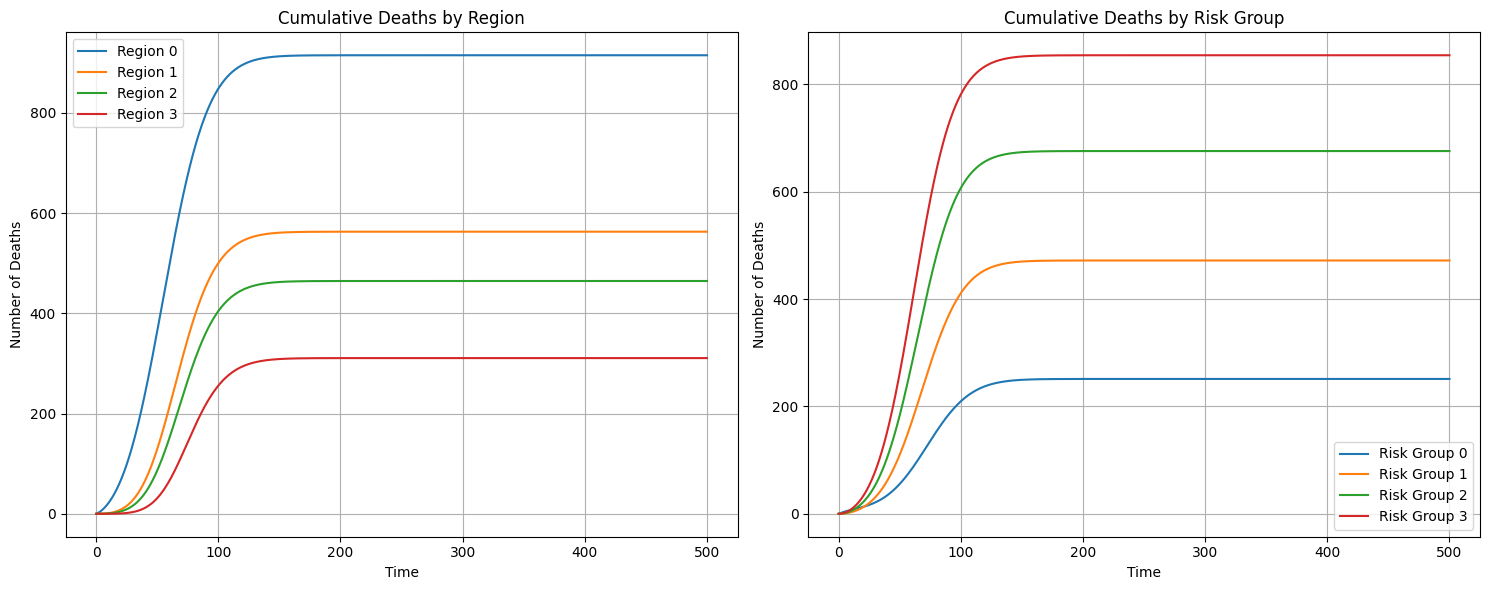

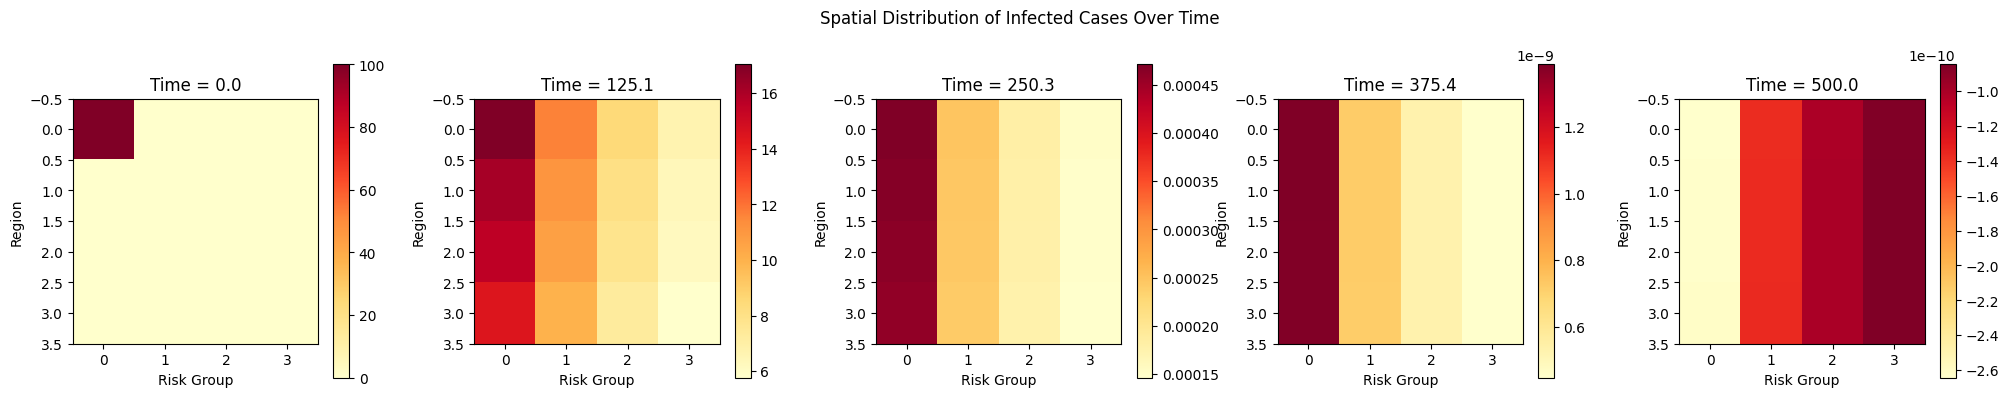

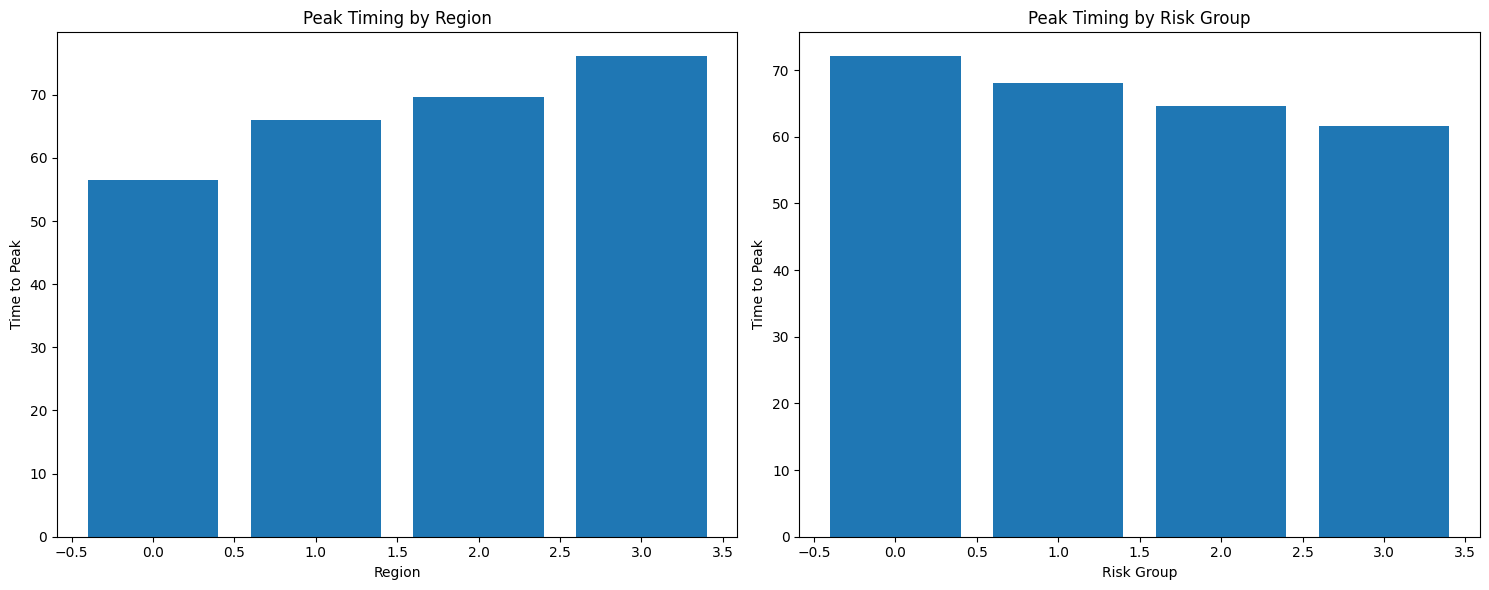

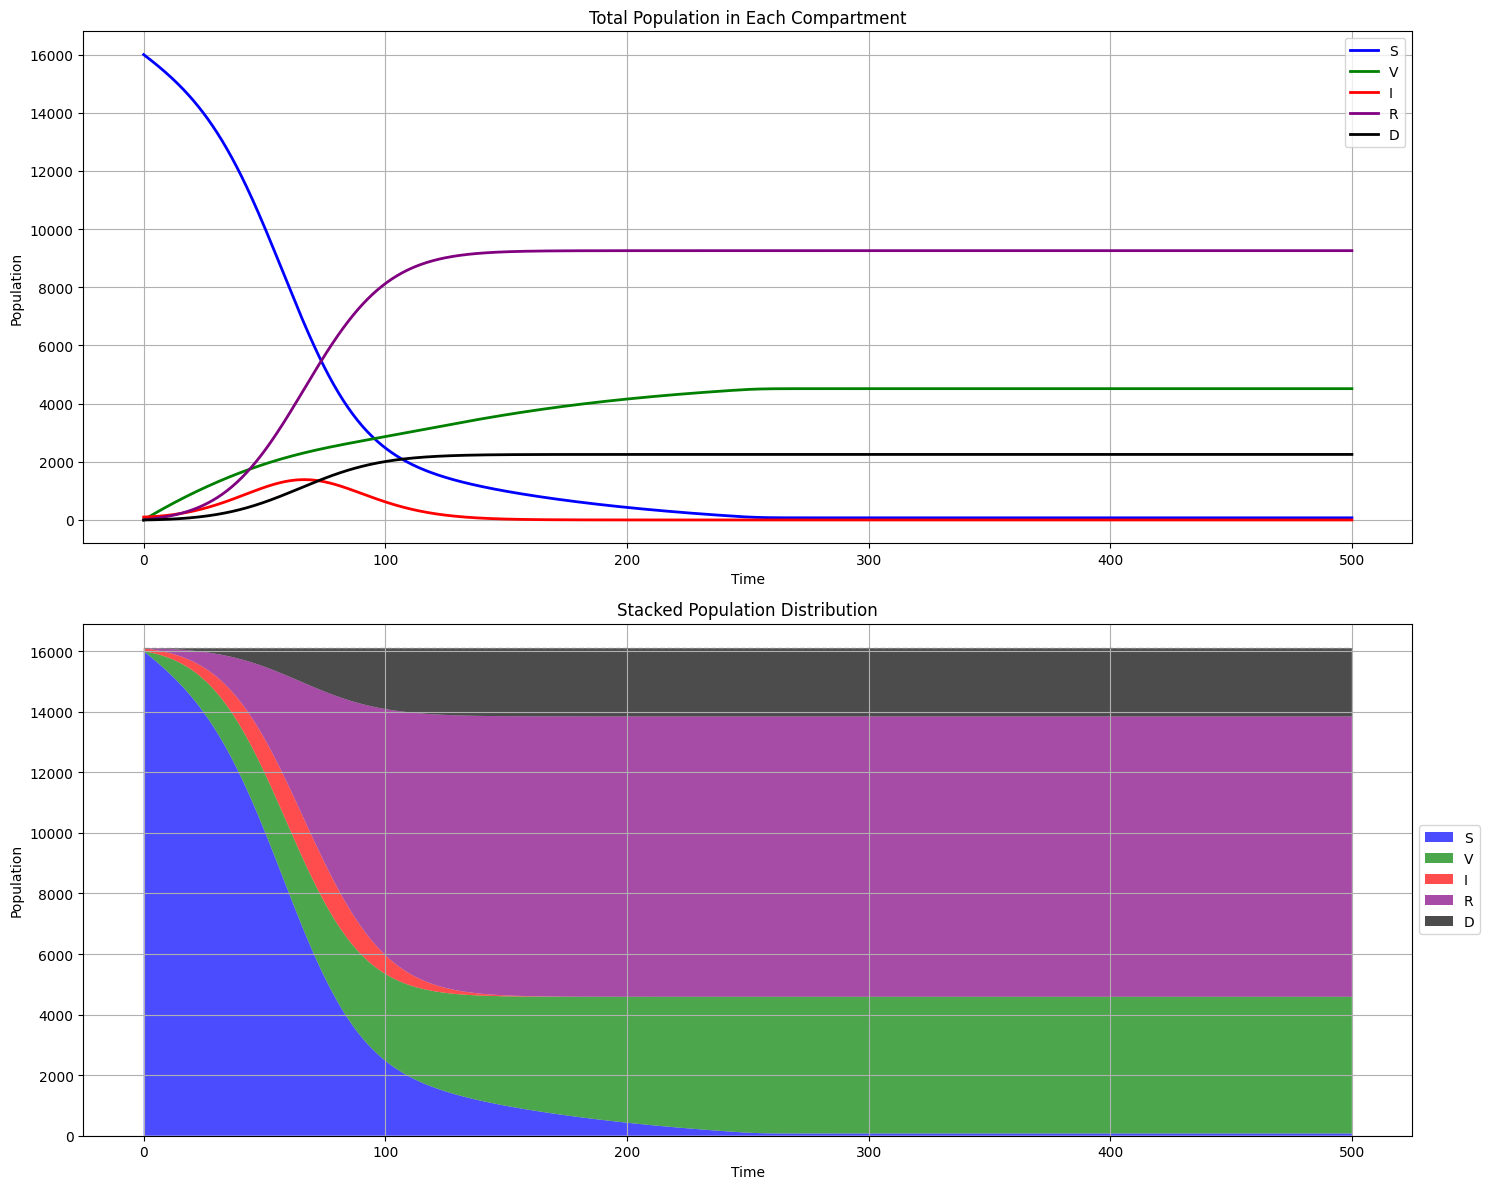


Summary Statistics:
--------------------------------------------------

S Compartment:
  Peak: 16000
  Final value: 74

V Compartment:
  Peak: 4515
  Final value: 4515

I Compartment:
  Peak: 1387
  Final value: -0

R Compartment:
  Peak: 9259
  Final value: 9259

D Compartment:
  Peak: 2253
  Final value: 2253

Population Conservation Check:
  Initial total: 16100
  Final total: 16100


In [2]:
# Test the implementation
if __name__ == "__main__":
    model = SVIRDModel()
    t, solution = model.test_simulation(t_max=500)
    
    # Generate all plots
    model.plot_region_comparison(t, solution)
    model.plot_risk_group_comparison(t, solution)
    model.plot_vaccination_progress(t, solution)
    model.plot_mortality_analysis(t, solution)
    model.plot_spatial_heatmap(t, solution)
    model.plot_peak_timing_analysis(t, solution)
    model.plot_all_compartments_combined(t, solution)

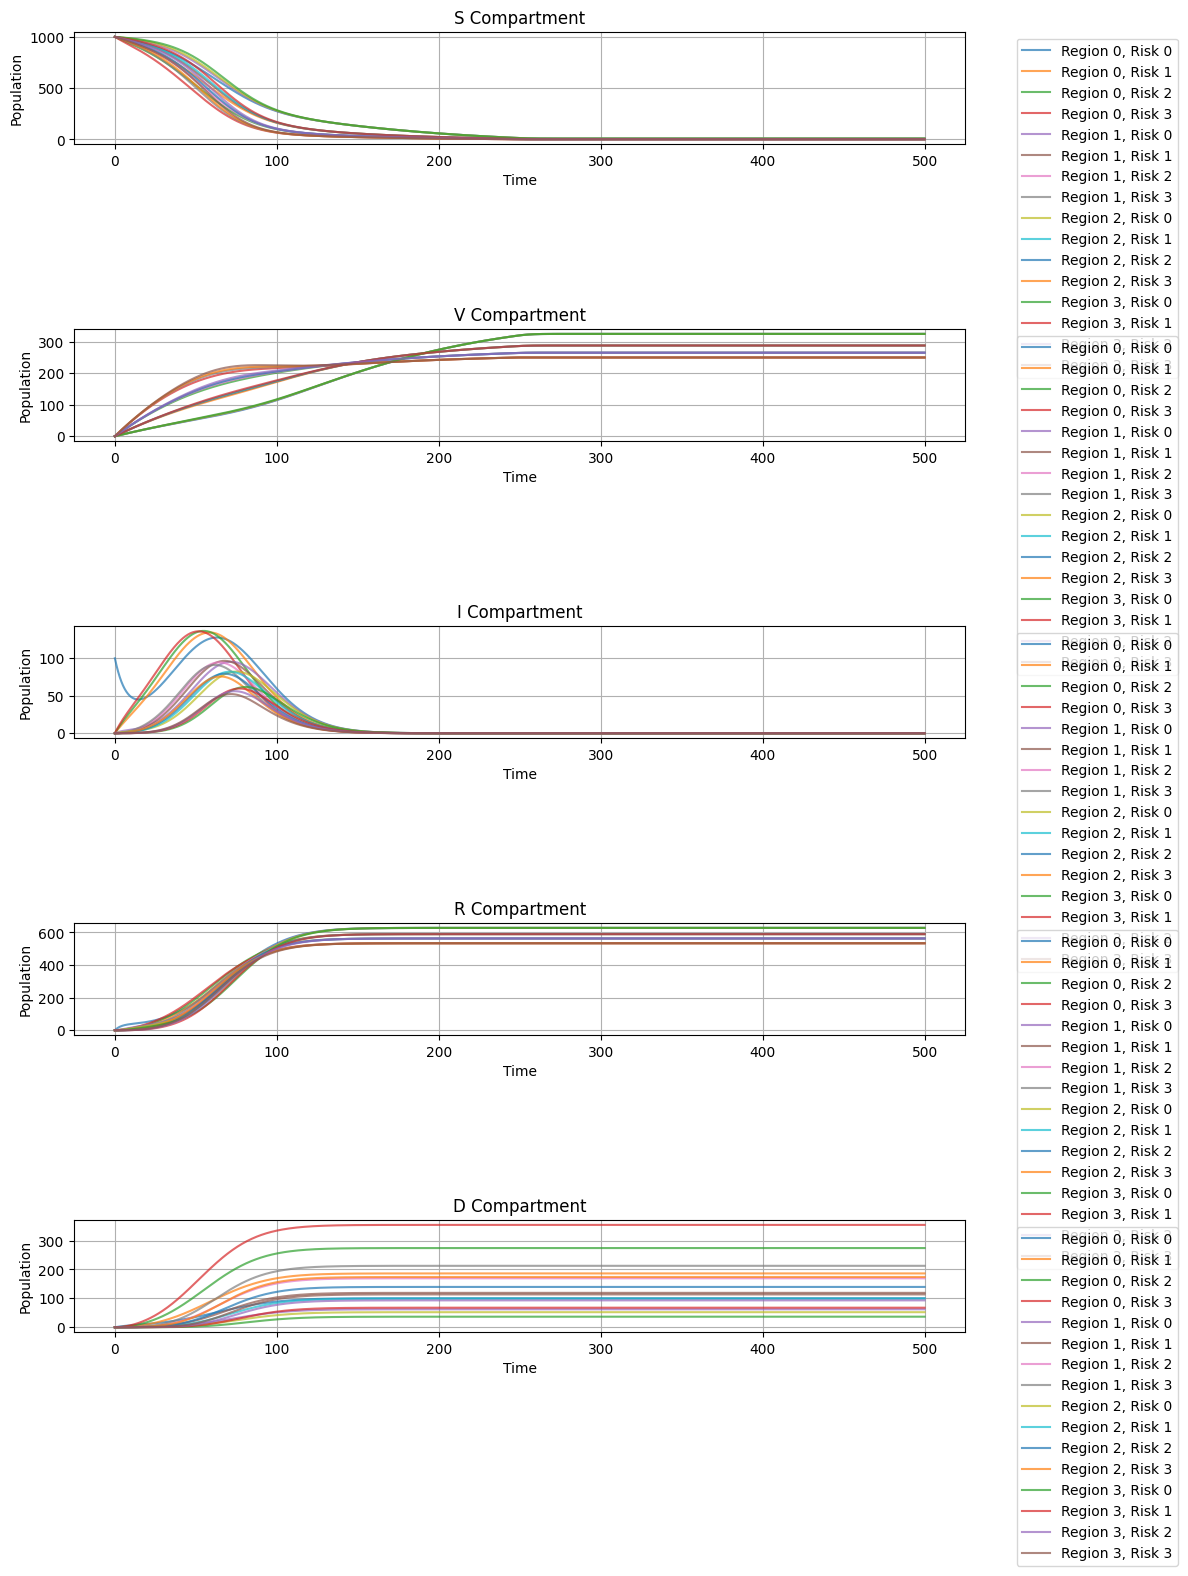

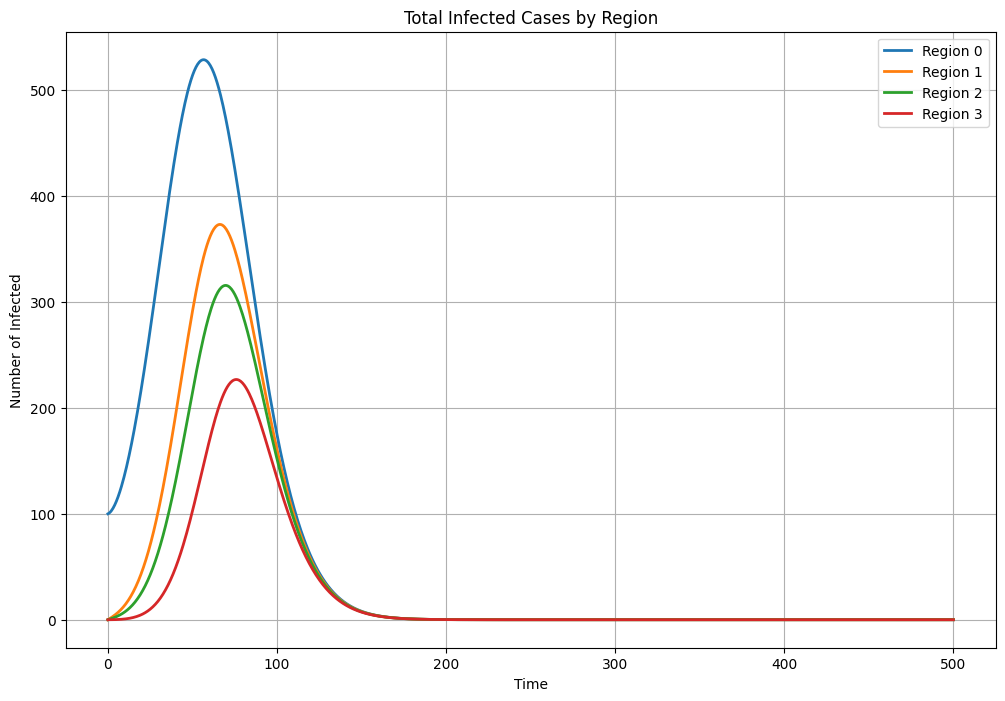

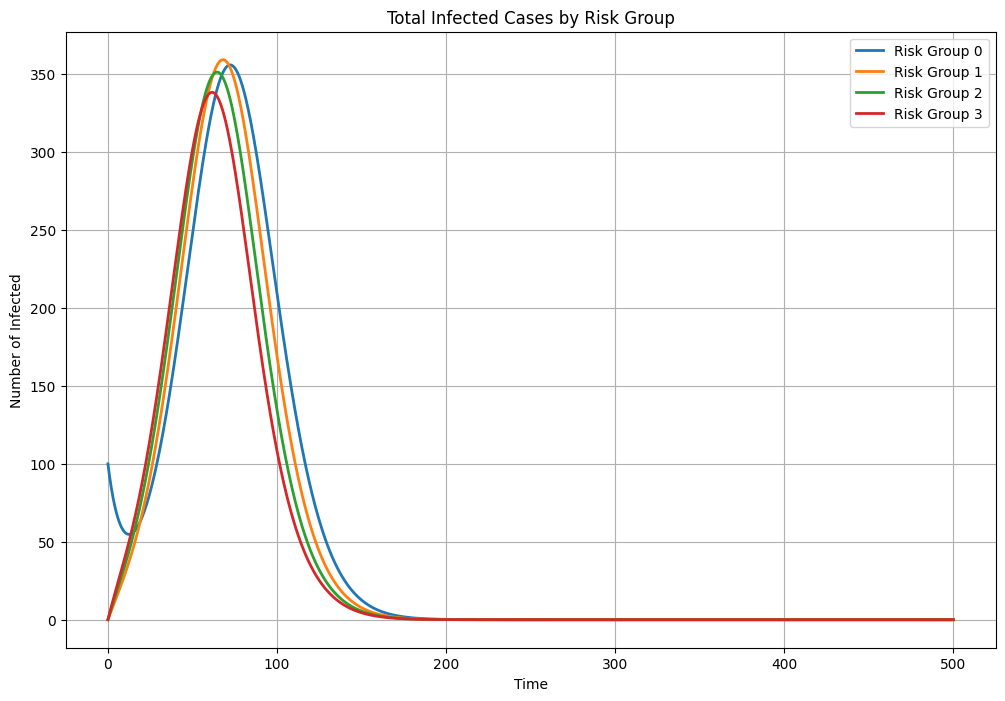

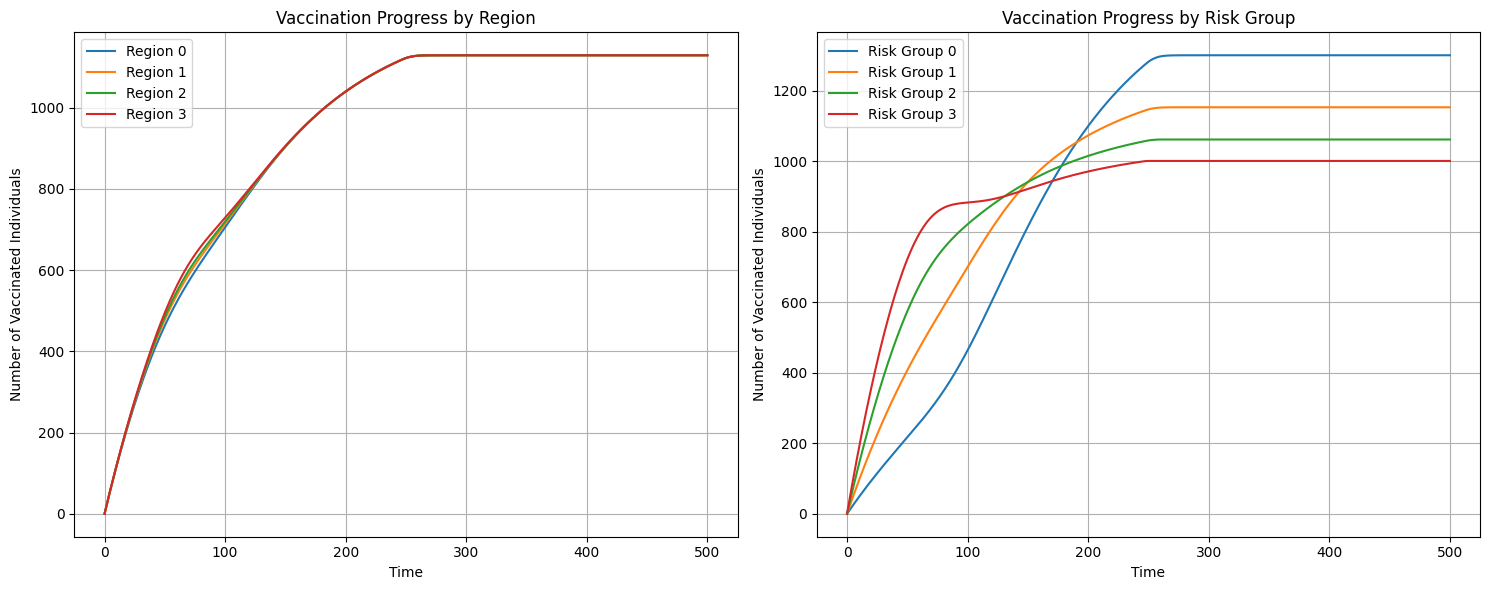

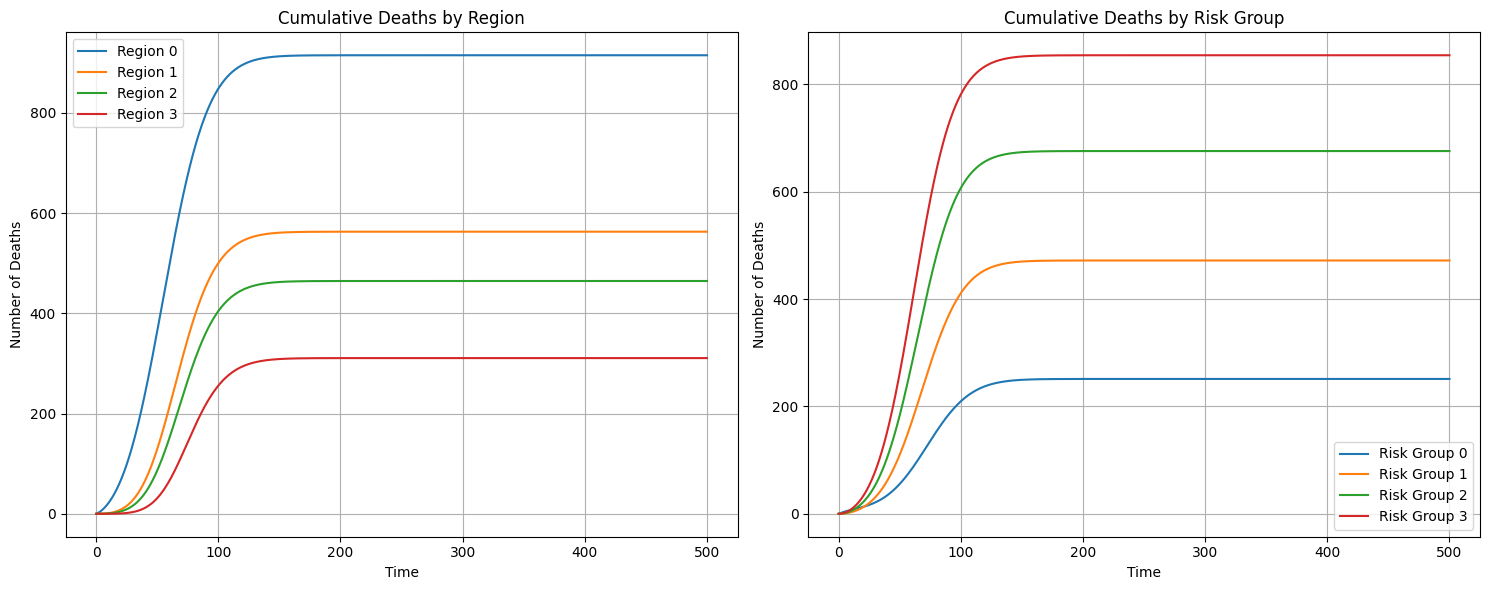

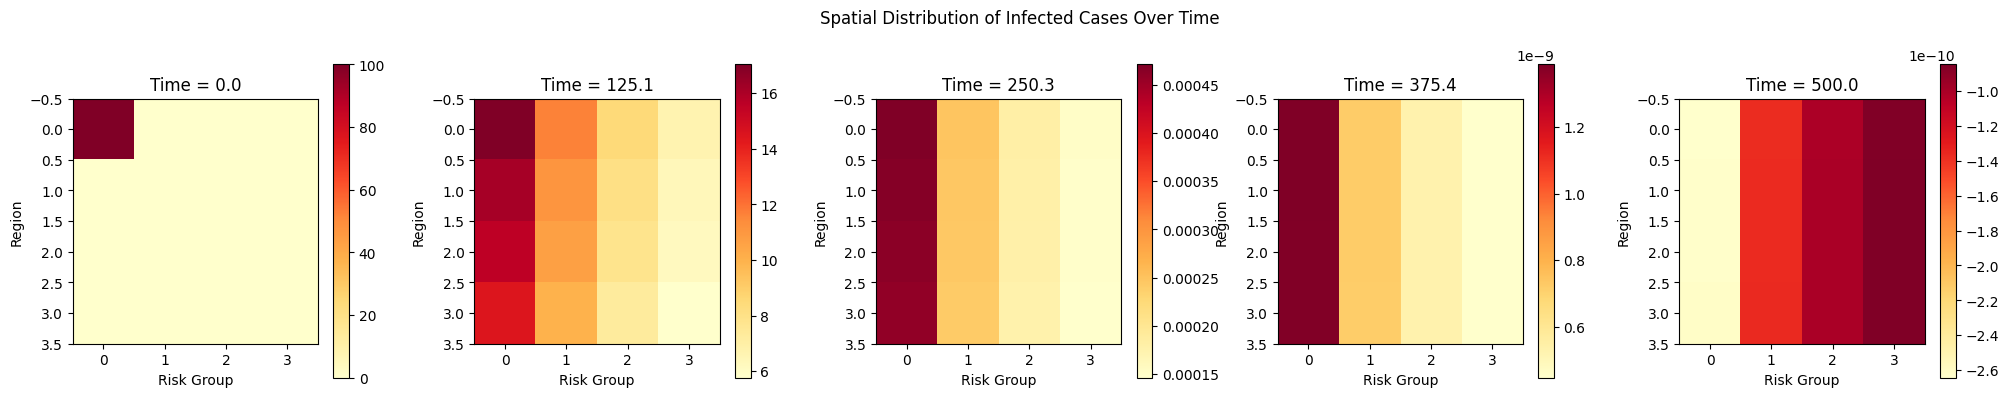

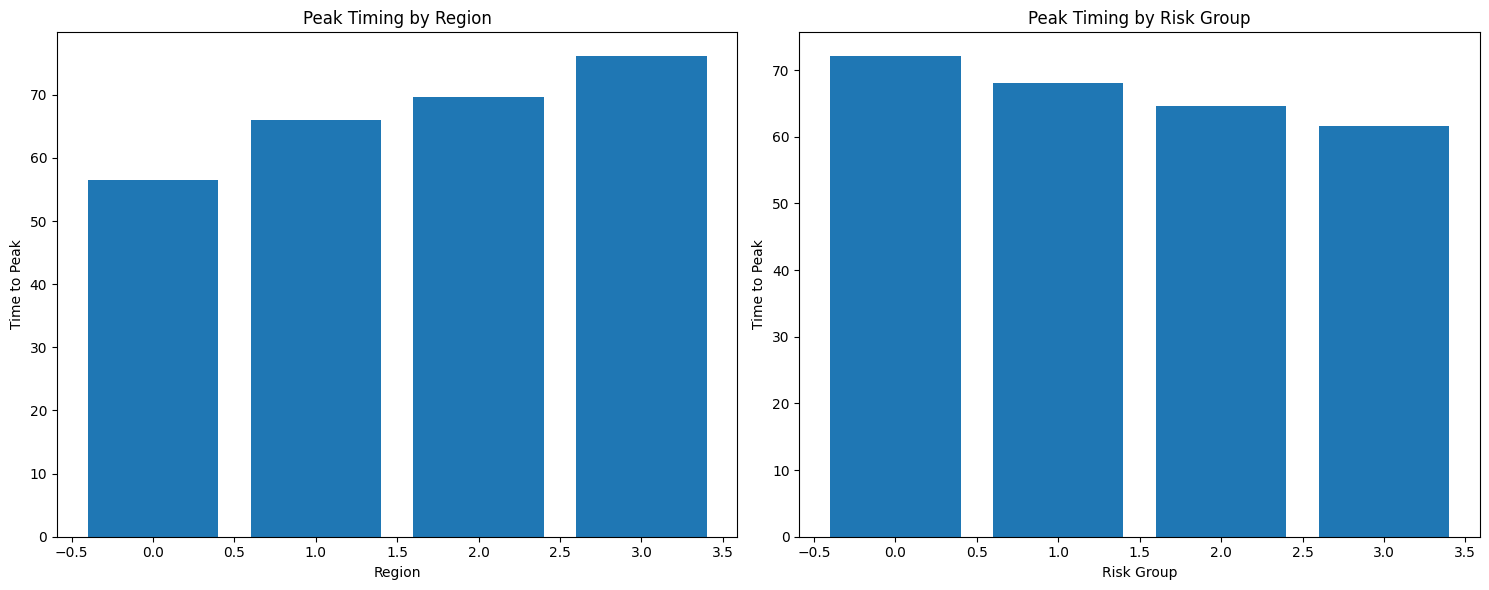

In [3]:
# Initialize SVIRD model
model = SVIRDModel()

# Set comparable parameters
model.params.update({
    'beta': np.array([0.3, 0.4, 0.5, 0.6]),  # Transmission rates
    'gamma': np.array([0.1, 0.1, 0.1, 0.1]), # Recovery rates
    'mu': np.array([0.01, 0.02, 0.03, 0.04]), # Mortality rates
    'nu': 50.0,  # Vaccination capacity
    'eta': 0.9,  # Vaccine efficacy
    'omega': 0.01, # Waning immunity rate
    'alpha': np.array([1.0, 2.0, 3.0, 4.0]),  # Vaccination priorities
    'diffusion': {
        'S': 0.1,
        'V': 0.05,
        'I': 0.01,
        'R': 0.1
    },
    'connectivity': np.array([
        [0, 1, 0.5, 0],
        [1, 0, 1, 0.5],
        [0.5, 1, 0, 1],
        [0, 0.5, 1, 0]
    ])
})

# Set initial conditions
initial_conditions = {
    'S': np.ones((4, 4)) * 1000,  # 1000 susceptible in each group
    'I': np.zeros((4, 4)),
    'V': np.zeros((4, 4)),
    'R': np.zeros((4, 4)),
    'D': np.zeros((4, 4))
}
initial_conditions['I'][0,0] = 100  # Start with 100 infected in region 0, risk group 0

# Run simulation
t, solution = model.test_simulation(t_max=500)

# Generate various analysis plots
model.plot_simulation(t, solution)
model.plot_region_comparison(t, solution)
model.plot_risk_group_comparison(t, solution)
model.plot_vaccination_progress(t, solution)
model.plot_mortality_analysis(t, solution)
model.plot_spatial_heatmap(t, solution)
model.plot_peak_timing_analysis(t, solution)

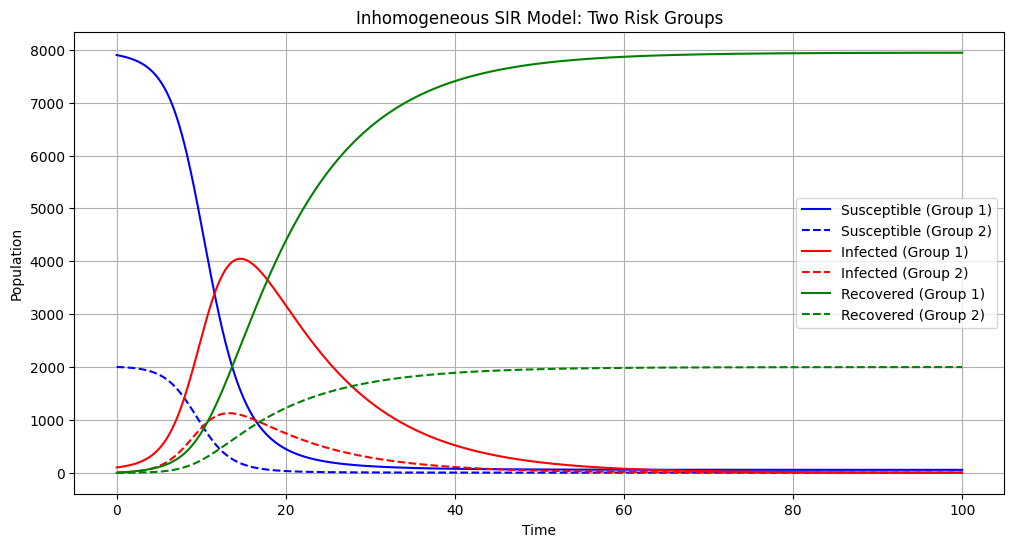

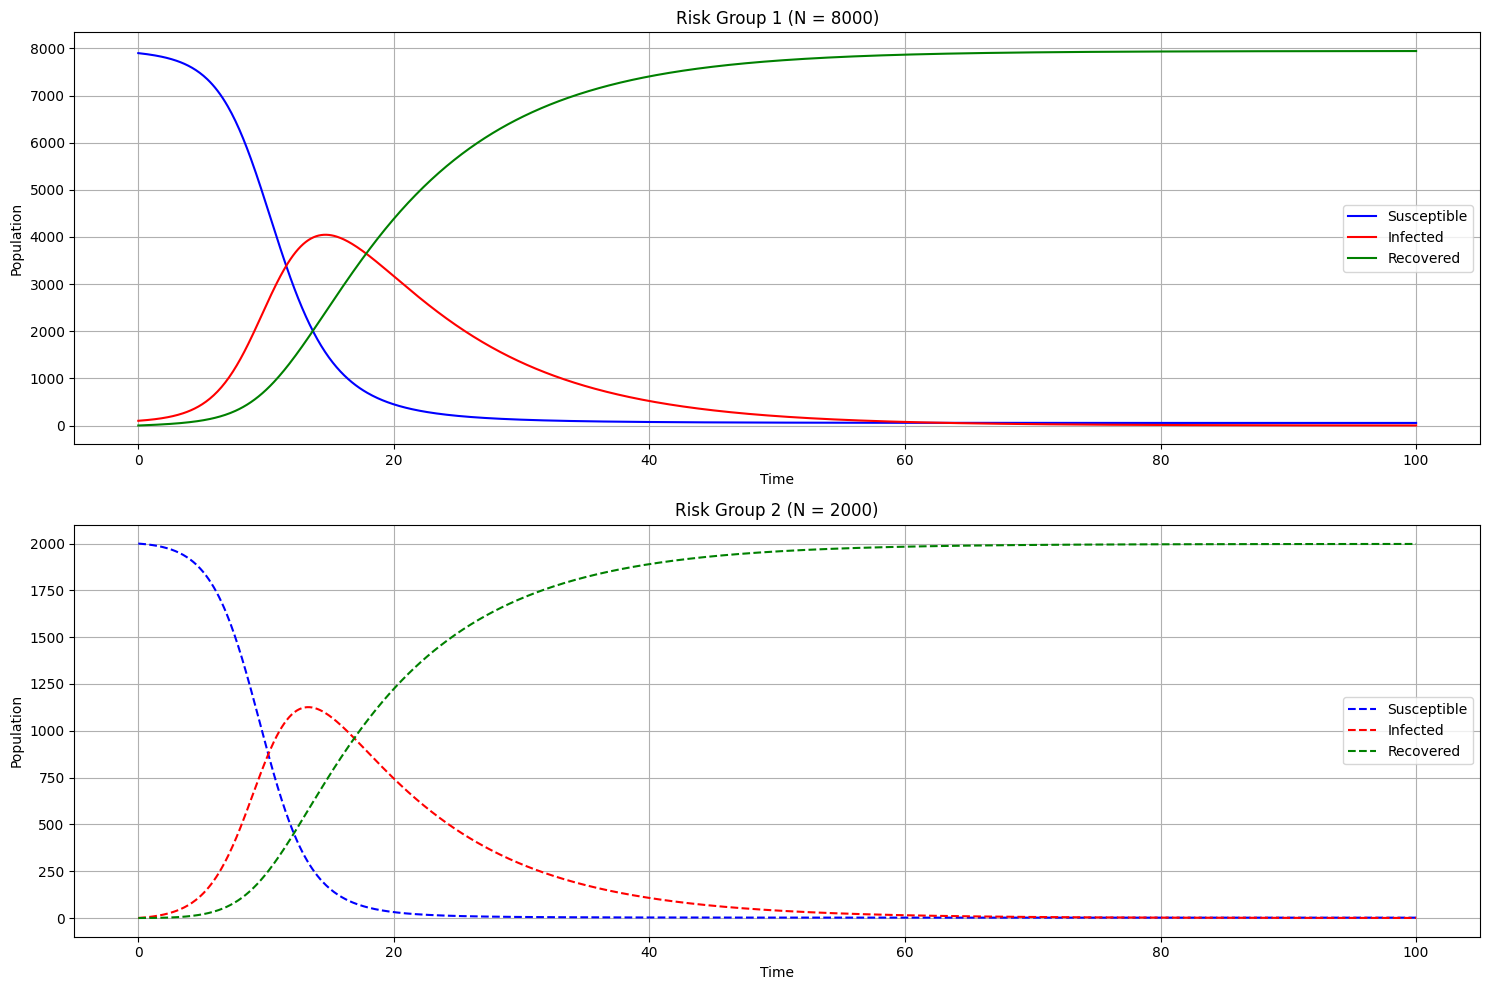


Analysis of Basic Inhomogeneous SIR Model:
Risk Group 1:
- Peak infected: 4047
- Peak timing: 14.6
- Final recovered: 7944

Risk Group 2:
- Peak infected: 1126
- Peak timing: 13.3
- Final recovered: 1998

Attack Rates:
Risk Group 1: 99.3%
Risk Group 2: 99.9%


In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sir import inhomogeneous_sir  # Using your existing implementation

# 1. First run the basic inhomogeneous SIR with two risk groups
N1, N2 = 8000, 2000  # Population sizes (high-risk and low-risk groups)
beta_matrix = np.array([[0.3, 0.2],  # Contact matrix between groups
                       [0.2, 0.5]])   # Higher contact rate in high-risk group
gamma_vec = np.array([0.1, 0.1])     # Recovery rates

# Initial conditions: start with some infected in high-risk group
I1_0, I2_0 = 100, 0  # Initial infected
R1_0, R2_0 = 0, 0    # Initial recovered 
S1_0, S2_0 = N1 - I1_0 - R1_0, N2 - I2_0 - R2_0  # Initial susceptible

state0 = np.array([S1_0, S2_0, I1_0, I2_0, R1_0, R2_0])
t = np.linspace(0, 100, 1000)

# Solve the system
solution = odeint(inhomogeneous_sir, state0, t, 
                 args=(beta_matrix, gamma_vec, np.array([N1, N2])))

# Create visualization comparing the two risk groups
plt.figure(figsize=(15, 10))

# Plot for first risk group (larger population)
plt.subplot(2, 1, 1)
plt.plot(t, solution[:, 0], 'b-', label='Susceptible')
plt.plot(t, solution[:, 2], 'r-', label='Infected')
plt.plot(t, solution[:, 4], 'g-', label='Recovered')
plt.title('Risk Group 1 (N = 8000)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Plot for second risk group (smaller population)
plt.subplot(2, 1, 2)
plt.plot(t, solution[:, 1], 'b--', label='Susceptible')
plt.plot(t, solution[:, 3], 'r--', label='Infected')
plt.plot(t, solution[:, 5], 'g--', label='Recovered')
plt.title('Risk Group 2 (N = 2000)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Now let's analyze some key metrics
# Peak infection timing and magnitude
peak_infected_1 = np.max(solution[:, 2])
peak_infected_2 = np.max(solution[:, 3])
peak_time_1 = t[np.argmax(solution[:, 2])]
peak_time_2 = t[np.argmax(solution[:, 3])]

print("\nAnalysis of Basic Inhomogeneous SIR Model:")
print(f"Risk Group 1:")
print(f"- Peak infected: {peak_infected_1:.0f}")
print(f"- Peak timing: {peak_time_1:.1f}")
print(f"- Final recovered: {solution[-1, 4]:.0f}")

print(f"\nRisk Group 2:")
print(f"- Peak infected: {peak_infected_2:.0f}")
print(f"- Peak timing: {peak_time_2:.1f}")
print(f"- Final recovered: {solution[-1, 5]:.0f}")

# Calculate attack rates
attack_rate_1 = (solution[-1, 4] / N1) * 100
attack_rate_2 = (solution[-1, 5] / N2) * 100
print(f"\nAttack Rates:")
print(f"Risk Group 1: {attack_rate_1:.1f}%")
print(f"Risk Group 2: {attack_rate_2:.1f}%")